<a href="https://colab.research.google.com/github/ArmstrongVo/VoTrongLuan.github.io/blob/main/AI_W7_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images.shape  # hiện thị số dữ liệu của images (số phần tử, dài, rộng của phần tử)
train_labels.shape



(60000,)

số này là: 1


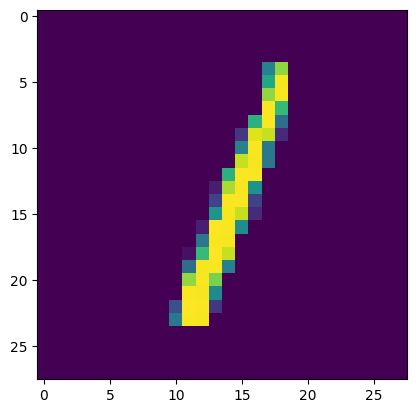

In [28]:
hinh = train_images[21070]  #lấy dữ liệu số X
import matplotlib.pyplot as plt

#plt.imshow(hinh,cmap = plt.cm.binary)
plt.show
plt.imshow(hinh)
print('số này là:',train_labels[21070])

<ipython-input-29-f51914b5e890>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)  # vẽ 3 cột 5 hàng với dữ liệu i+1


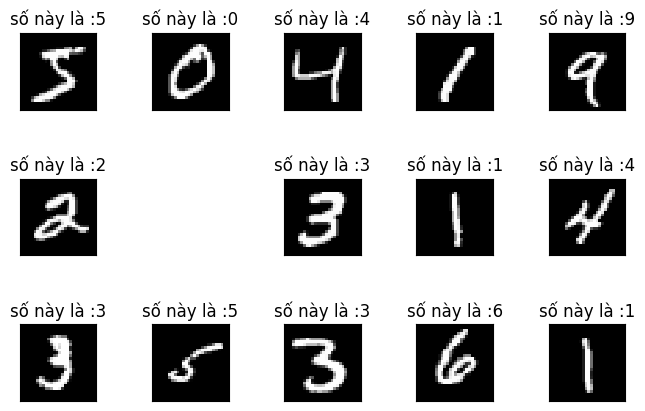

In [29]:

for i in range (15):
  plt.subplot(3,5,i+1)  # vẽ 3 cột 5 hàng với dữ liệu i+1
  plt.tight_layout() # tự động điều chỉnh thông số của ô con để phù hợp với hình
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('số này là :{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
     

In [30]:
from keras.models.cloning import Sequential  # sequential để hiển thị mạng_ANN
from keras import models   
from keras.layers import Dense   # Dense = full connected _ tế bào vào 1 sẽ auto kết nối với toàn bộ các tế bào của lớp hiden con
model=Sequential()  
model.add(Dense(512,activation='relu',input_shape = (28*28,),name='layout1'))   # thêm 512 neron, sử dụng hàm relu, ngõ vào 28*28 _1 cột
model.add(Dense(10,activation='softmax',name='layoutN'))  # 10 layout 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [36]:
X= test_images
Y= test_labels
train_images=train_images.reshape((60000,28*28)) # đổi đầu vào từ 2 chiều 28*28 thành 1 chiều 
train_images=train_images.astype('float32')/255 # đổi kiểu int sang float _ hay chuyển giá trị từ 0-255 thành 0-1 gray sáng trắng đen
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255


train_images.shape

from keras.utils import to_categorical  # chuyển output sang số 1 nổi, 1 lần  _ chuyển từ 1 bit thành n bit
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
print(train_labels.shape)
print(test_labels.shape)

     


     

(60000, 10, 10)
(10000, 10, 10)


In [32]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])   # chọn bộ tối ưu rmsprop, đánh giá mất mát theo kiểu categorical với biến crossentropy, đo hiệu quả bằng hàm accuracy
model.fit(train_images,train_labels,epochs=10,batch_size=128)  # tiến hành train, số lần học là 10, mỗi lần học ngẫu nhiên 128 giá trị
test_loss,test_acc=model.evaluate(test_images,test_labels)   # kiểm tra độ chính xác
print('độ chính xác:',test_acc)
print('hàm mất mát',test_loss)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2664 - accuracy: 0.9240
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1065 - accuracy: 0.9690
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0709 - accuracy: 0.9785
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0511 - accuracy: 0.9844
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0386 - accuracy: 0.9880
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0289 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0225 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0163 - accuracy: 0.9957
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0124 - accuracy: 0.9967
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.98

In [44]:
X[1000]=X[1000].reshape(1,28*28)
X[1000]=X[1000].astype('float32')/255
y_predict = model.predict(X[1000].reshape(1,28*28))
print(y_predict)


1/1 [==============================] - 0s 32ms/step
[[0.04932323 0.07209682 0.06979064 0.05945556 0.07265516 0.36383003
  0.06339238 0.12093025 0.05636567 0.07216027]]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.000000